<a href="https://colab.research.google.com/github/stev0NaN/performancetest/blob/main/proyecto_final_SanchezdelaBarquera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Link a Documento del Proyecto Final**

https://drive.google.com/file/d/13UYW6ofPsgtjNv0Ah-Dpd1j8BDY_FxBN/view?usp=sharing

#**Abstract**





El análisis de datos proporcionados por un GPS es una herramienta valiosa para mejorar el rendimiento de un equipo de fútbol soccer.

Este tipo de análisis permite identificar patrones de movimiento, niveles de esfuerzo y otros datos clave que pueden ser utilizados para optimizar el entrenamiento y la estrategia del equipo.

La audiencia para esta presentación puede incluir entrenadores, jugadores y otros miembros del equipo, así como analistas deportivos.

#**Definición de Objetivo**

La motivación para presentar este análisis de datos es mejorar el rendimiento del equipo y lograr resultados exitosos en el campo de juego.

#**Contexto Empresarial**

El equipo de primera división llamado WIMU TEAM ha decidido tomar en cuenta los datos GPS que sus jugadores del primer equipo tienen durante la semana de prueba de la nueva herramienta para gestionar los entrenamientos y sacar el máximo provecho a cada uno de ellos.

#**Problema Comercial**

Su tarea es interpretar los datos que generan los GPS y generar visualizaciones que respondan las preguntas específicas que tiene el staff de entrenadores, las cuales vemos a continuación:

1.¿Qué tipo de entrenamiento es más popular?

2.¿Qué días de la semana es cuando más carga de trabajo en metros recorridos hay?

3.¿Cuáles son los jugadores con la mayor distancia recorrida?

4.¿Quiénes son los jugadores más veloces? y si existe alguna correlación respecto a su posición en el terreno de juego.

#**Contexto Analítico**

El conjunto de datos "week_sessions" es un archivo en formato CSV que contiene información sobre las sesiones de entrenamiento de los usuarios de una plataforma de monitoreo GPS durante una semana.

El archivo contiene 18 columnas y 548 filas de datos.

Cada fila representa un jugador del equipo, y las columnas proporcionan información sobre la sesión, como el identificador de usuario, la fecha, la duración de la sesión, el tipo de sesión, la distancia recorrida durante la sesión, la distancia recorrida entre intervalos de velocidad y la máxima velocidad alcanzada en Km/h.

#**Data Wrangling**

In [ ]:
# Importar Librerías.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Carga del Dataset desde repo de Github.

url = 'https://raw.githubusercontent.com/stev0NaN/performancetest/main/week_sessions.csv'

week = pd.read_csv(url)
week = pd.DataFrame(week)

In [ ]:
# Declarar el Username como Index en nuestro Dataframe

week = week.set_index('Username')

In [ ]:
week.head()

,Position,Team Name,Session Date,Match Day,Session Type,Session Name,Task Name,Player Duration,Distance (m),"Speed Zones (m) [0.0, 6.0]","Speed Zones (m) [6.0, 12.0]","Speed Zones (m) [12.0, 18.0]","Speed Zones (m) [18.0, 21.0]","Speed Zones (m) [21.0, 24.0]","Speed Zones (m) [24.0, 50.0]",Max Speed (km/h),Max Speed (Historical Player Maximum)
Username,,,,,,,,,,,,,,,,,
phillippfarber,Midfielder,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,8133.592821,2821.838135,2873.652588,1458.796509,426.581787,343.451843,209.272110,31.161600,36.390000
nereomarino,Centre Back,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,5086.417666,2020.478394,2062.734131,899.350403,83.303360,20.551388,0.000000,23.587200,33.570000
patrickkrueger,Midfielder,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:29:15,718.713690,431.481506,273.783447,13.448741,0.000000,0.000000,0.000000,15.706800,34.247002
marvinsharpe,Winger,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,9572.792150,4374.458008,2901.281006,1594.261841,330.291931,249.323852,123.175400,31.323601,37.723999
kianlong,Right Back,Wimu team,08/03/2021,+2 MD,Tactical,SESSION 08.03,Session,01:48:14,8278.748661,3404.831299,2830.495605,1655.305176,237.453812,91.589828,59.072899,31.226398,37.720000


In [ ]:
# Identificar Missing Values.

missing_week = week.isnull()
missing_week.head()

,Position,Team Name,Session Date,Match Day,Session Type,Session Name,Task Name,Player Duration,Distance (m),"Speed Zones (m) [0.0, 6.0]","Speed Zones (m) [6.0, 12.0]","Speed Zones (m) [12.0, 18.0]","Speed Zones (m) [18.0, 21.0]","Speed Zones (m) [21.0, 24.0]","Speed Zones (m) [24.0, 50.0]",Max Speed (km/h),Max Speed (Historical Player Maximum)
Username,,,,,,,,,,,,,,,,,
phillippfarber,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nereomarino,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
patrickkrueger,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
marvinsharpe,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
kianlong,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


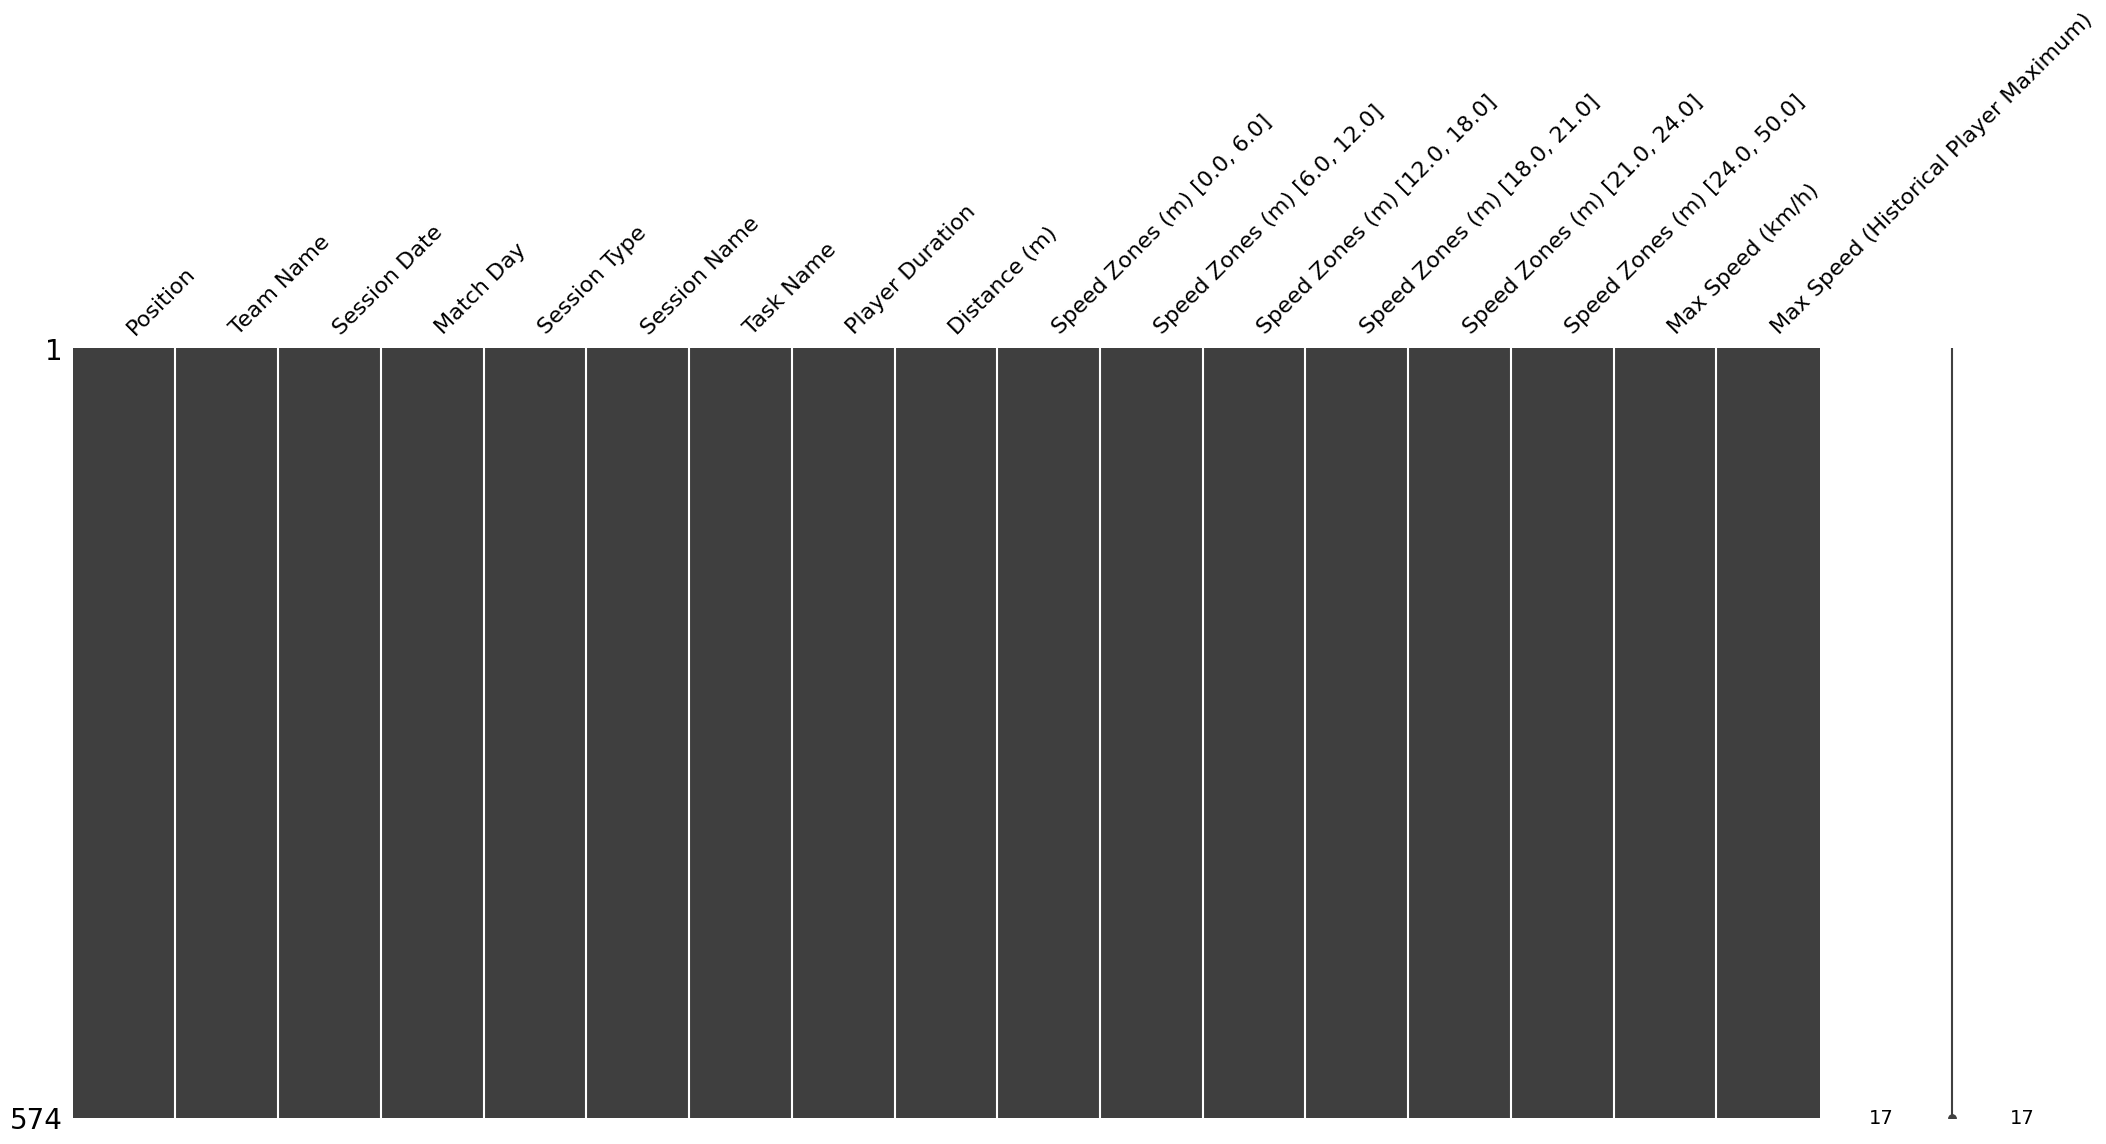

In [ ]:
# Identificación por medio de "missingno"

import missingno as msno
msno.matrix(week)
plt.show()

Con estos métodos .isnull() y msno.matrix() se comprueba que no tenemos valores faltantes en ninguna de las columnas de nuestro Dataset, con el código a continuación contamos cuantos "false" o "True" como prueba de que no tenemos faltantes.

In [ ]:
# Contar missing values por columna si es que existen.

for column in missing_week.columns.values.tolist():
    print(column)
    print (missing_week[column].value_counts())
    print("")

Position
False    574
Name: Position, dtype: int64

Team Name
False    574
Name: Team Name, dtype: int64

Session Date
False    574
Name: Session Date, dtype: int64

Match Day
False    574
Name: Match Day, dtype: int64

Session Type
False    574
Name: Session Type, dtype: int64

Session Name
False    574
Name: Session Name, dtype: int64

Task Name
False    574
Name: Task Name, dtype: int64

Player Duration
False    574
Name: Player Duration, dtype: int64

Distance (m)
False    574
Name: Distance (m), dtype: int64

Speed Zones (m) [0.0, 6.0]
False    574
Name: Speed Zones (m) [0.0, 6.0], dtype: int64

Speed Zones (m) [6.0, 12.0]
False    574
Name: Speed Zones (m) [6.0, 12.0], dtype: int64

Speed Zones (m) [12.0, 18.0]
False    574
Name: Speed Zones (m) [12.0, 18.0], dtype: int64

Speed Zones (m) [18.0, 21.0]
False    574
Name: Speed Zones (m) [18.0, 21.0], dtype: int64

Speed Zones (m) [21.0, 24.0]
False    574
Name: Speed Zones (m) [21.0, 24.0], dtype: int64

Speed Zones (m) [24.0, 50.

No se ecuentran valores perdidos en el Dataset porque nos da como resultado "False" en las 574 filas que tiene el archivo, si existiera algún "True" el comando hubiese dado la cuenta en el resultado.

In [ ]:
# Eliminar filas con índice 'TEAM' ya que son filas que nos dan el promedio del grupo durante el día de entrenamiento.

week = week.drop(week[week.index == 'TEAM'].index)

In [ ]:
# Procedemos a revisar que todos los valores tengan el formato adecuado.

week.dtypes

Position                                  object
Team Name                                 object
Session Date                              object
Match Day                                 object
Session Type                              object
Session Name                              object
Task Name                                 object
Player Duration                           object
Distance (m)                             float64
Speed Zones (m) [0.0, 6.0]               float64
Speed Zones (m) [6.0, 12.0]              float64
Speed Zones (m) [12.0, 18.0]             float64
Speed Zones (m) [18.0, 21.0]             float64
Speed Zones (m) [21.0, 24.0]             float64
Speed Zones (m) [24.0, 50.0]             float64
Max Speed (km/h)                         float64
Max Speed (Historical Player Maximum)    float64
dtype: object

Como podemos observar, hay columnas que no tienen un formato adecuado por ejemplo tenemos en la columna "Session Date" un tipo object y es un a fecha,
por lo tanto debe de estar en datetime.

In [ ]:
# Procedemos a cambiar el tipo de valores para la fecha y creamos una nueva columna con el nuevo valor.

week["Session Date Convertida"] = pd.to_datetime(week["Session Date"], dayfirst=True)


In [ ]:
# Quitamos Columnas que no nos aportan nada para nuestro Análisis

# Lista de nombres de las columnas a eliminar
columnas_a_eliminar = ["Session Date", "Task Name", "Session Name", "Team Name", "Match Day", "Player Duration"]

# Eliminar las columnas del DataFrame
week = week.drop(columnas_a_eliminar, axis=1)


In [ ]:
# Se observan las columnas que nos quedan y corroboramos tipo de valores.

week.dtypes

Position                                         object
Session Type                                     object
Distance (m)                                    float64
Speed Zones (m) [0.0, 6.0]                      float64
Speed Zones (m) [6.0, 12.0]                     float64
Speed Zones (m) [12.0, 18.0]                    float64
Speed Zones (m) [18.0, 21.0]                    float64
Speed Zones (m) [21.0, 24.0]                    float64
Speed Zones (m) [24.0, 50.0]                    float64
Max Speed (km/h)                                float64
Max Speed (Historical Player Maximum)           float64
Session Date Convertida                  datetime64[ns]
dtype: object

In [ ]:
# Verificar si hay duplicados en el índice
duplicados = week.index.duplicated()

# Verificar si hay algún duplicado
if duplicados.any():

    # Mostrar los índices duplicados
    indices_duplicados = week.index[duplicados]
    print("Se encontraron duplicados en los siguientes índices:")
    print(indices_duplicados)

else:
    print("No se encontraron duplicados en el índice.")

Se encontraron duplicados en los siguientes índices:
Index(['phillippfarber', 'patrickkrueger', 'nereomarino', 'michalmunro',
       'marvinsharpe', 'kianlong', 'davutmeijs', 'luisribeiro', 'marmion',
       'noahbrooks',
       ...
       'patrickkrueger', 'noahbrooks', 'michalmunro', 'marvinsharpe',
       'kianlong', 'georgeconnolly', 'davutmeijs', 'luisribeiro', 'marmion',
       'nereomarino'],
      dtype='object', name='Username', length=507)


Encontramos índex repetidos, ya que son los jugadores que hay en la sesión de entrenamiento por día. Por tal motivo no podemos eliminarlos y se decide agruparlos por Index para no tener faltantes en nuestro Dataset.

In [ ]:
# Agrupar índices duplicados
grupos = week.groupby(week.index)

# Mostrar los índices agrupados
print("Índices agrupados:")
for indice, grupo in grupos:
    print(indice)


Índices agrupados:
Ross2
Sergio01
Sullivan2
charliejames
davutmeijs
georgeconnolly
kianlong
luisribeiro
marmion
marvinsharpe
michalmunro
nereomarino
noahbrooks
patrickkrueger
phillippfarber
ricardo
samuelburton
scottmontague


In [ ]:
#Se identifica un error entre el nombre de los defensores centrales, existe la posición: Centre Back y Center Back. Procedemos a normalizar el nombre para que sea Center Back.

week = week.replace('Centre Back', 'Center Back')

In [ ]:
# Así nos resulta el Dataset con las características de DataWrangling, tomando camino hacia nuestro EDA

print(week)

                   Position         Session Type  Distance (m)  \
Username                                                         
phillippfarber   Midfielder             Tactical   8133.592821   
nereomarino     Center Back             Tactical   5086.417666   
patrickkrueger   Midfielder             Tactical    718.713690   
marvinsharpe         Winger             Tactical   9572.792150   
kianlong         Right Back             Tactical   8278.748661   
...                     ...                  ...           ...   
georgeconnolly    Left Back  Coadjuvant Recovery   1129.474755   
davutmeijs           Winger  Coadjuvant Recovery   1086.832229   
luisribeiro          Winger  Coadjuvant Recovery   1198.952413   
marmion           Left Back  Coadjuvant Recovery    981.093150   
nereomarino     Center Back  Coadjuvant Recovery    911.921996   

                Speed Zones (m) [0.0, 6.0]  Speed Zones (m) [6.0, 12.0]  \
Username                                                          

#**Análisis Estadístico de Datos (EDA)**



## **1.¿Qué tipo de entrenamiento es más popular?**

Con el siguiente gráfico encontramos que el entrenamiento ***táctico colectivo*** tiene la mayor densidad de entrenamiento dentro de las sesiones. Lo cual nos podría indicar que el tipo de entrenamiento llevado a cabo forma parte de las nuevas tendencias en entrenamiento como lo es la Periodización Táctica o el Entrenamiento Estructurado, donde en la sesión no se separa ninguno de los elementos del juego para entrenarlos por separado.


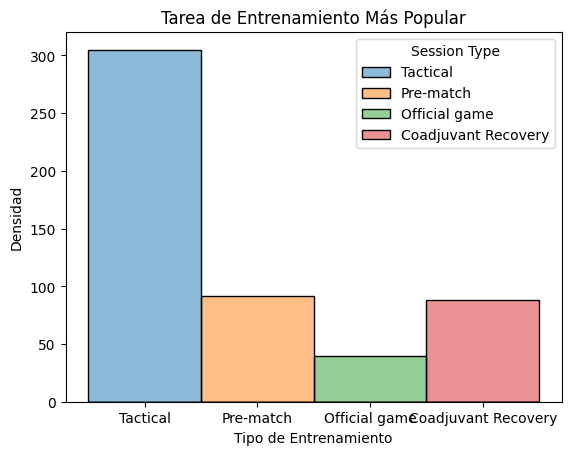

In [ ]:
ax=sns.histplot(
    data=week, hue="Session Type",
    x="Session Type")
ax.set(xlabel='Tipo de Entrenamiento', ylabel='Densidad', title='Tarea de Entrenamiento Más Popular')

plt.rc('xtick', labelsize=7)
plt.show()


## **2.¿Qué días de la semana es cuando más carga de trabajo en metros recorridos hay?**

En el siguientegráfico podemos identificar el ***día de la semana que más carga en distancia*** tenemos; nos arroja un descubrimiento importante y es: que el fin de semana en sábado es el día que mayor carga tenemos ya que es el día de juego oficial y por obviedad la competencia genera mayor carga.

Lo que nos indica que la carga semanal de entrenamiento de la resistencia no está llegando a valores cercanos a la competencia por lo tanto se debería ajustar la carga para que los estímulos en los días de entrenamiento de la resistencia sean lo más cercanos al día de competencia.

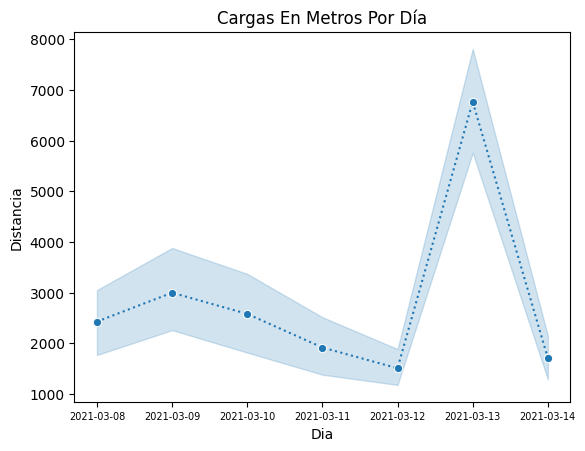

In [ ]:
ax= sns.lineplot(x = "Session Date Convertida", y = "Distance (m)", data = week, marker="o", linestyle=":")
ax.set (xlabel='Dia', ylabel='Distancia', title='Cargas En Metros Por Día')
plt.rc('xtick', labelsize=5)
plt.show()

## **3.¿Cuáles son los jugadores con la mayor distancia recorrida?**

Con la suma de metros por jugador, encontramos que hay jugadores que tienen una elevada carga con respecto al de otros jugadores, estos descubrimientos nos pueden decir que dentro de las tareas de entrenamiento o incluso juegos oficiales han tenido un rendimiento mas bajo de lo normal.
Incluso nos podría indicar a los jugadores que están apartados del entrenamiento haciendo tareas diferenciadas debido a una lesión.

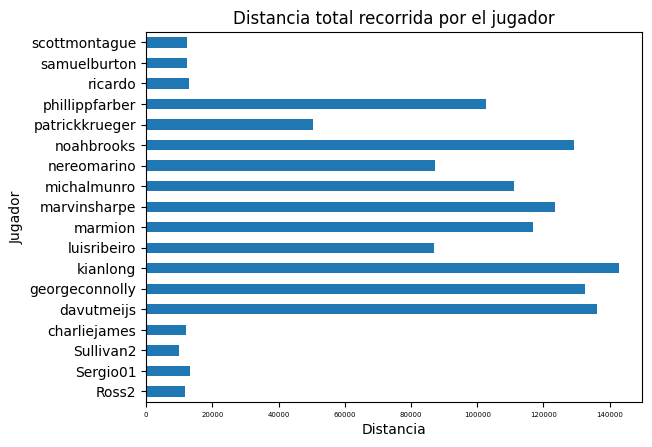

In [ ]:
week.groupby('Username')['Distance (m)'].sum().plot(kind='barh')

plt.xlabel('Distancia')
plt.ylabel('Jugador')
plt.title('Distancia total recorrida por el jugador')
plt.show()

## **4.¿Quiénes son los jugadores más veloces? y si existe alguna relación respecto a su posición en el terreno de juego.**

Con este gráfico de cajas podemos observar a los jugadores y su posición y quienes fueron los que alcanzan mayor velocidad durante la semana.

Descubrimos que las posiciones tienen un pico de velocidad máxima similar y, los valores por debajo nos hablan de aspectos tacticos que pudieran repercutir en el desempeño del equipo, vemos la posición de defensor central que tiene valores muy bajos lo cual nos habla de que el jugador pudo haber estado caminando y desconectado de las fases del juego; vemos también valores bajos en extremos y laterales lo cual nos hablaría que están teniendo regresos a defender la posición muy lenta.

Cabe destacar el trabajo de los medicampistas ya que pasan por la mayoría de las zonas de velocidad, por lo tanto nos indica una implicación máxima en el juego y con el equipo estando atentos a las transiciones, apoyos, desmarques, etc.

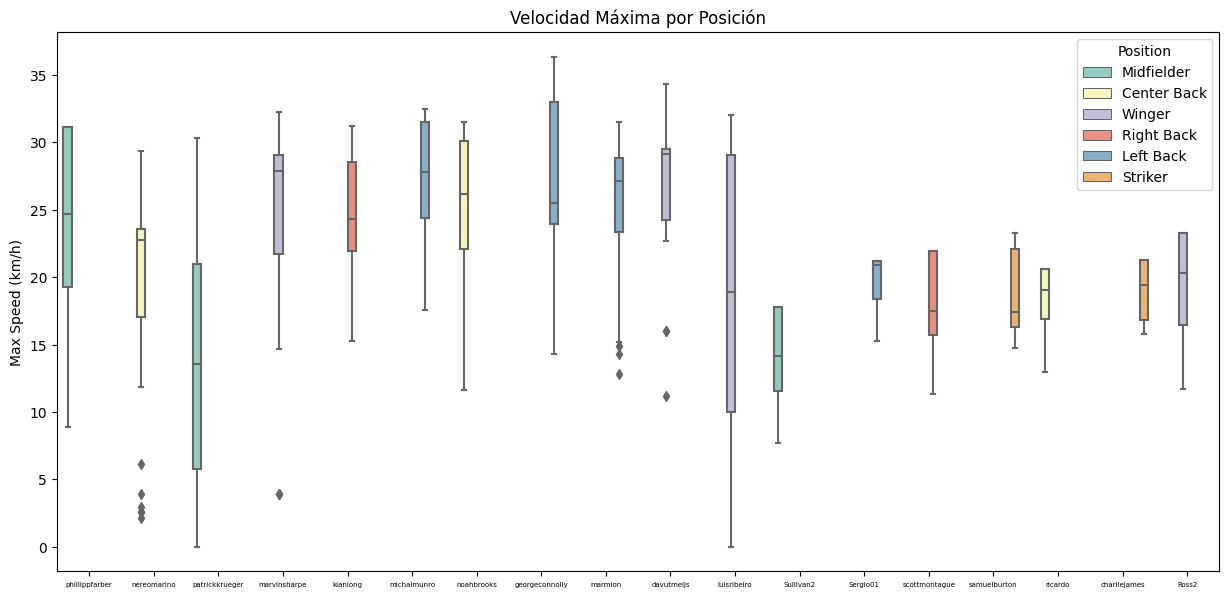

In [ ]:
ax = plt.subplots(figsize = (15, 7))

indices = week.index.tolist()
ax=sns.boxplot(data=week, x=indices, y="Max Speed (km/h)",  palette = "Set3", hue= "Position")
ax.set(title='Velocidad Máxima por Posición')
plt.rc('xtick', labelsize=6)
plt.show()

<ipython-input-21-d0052a1b6be3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(week.corr(), annot = True, cmap = 'Wistia')


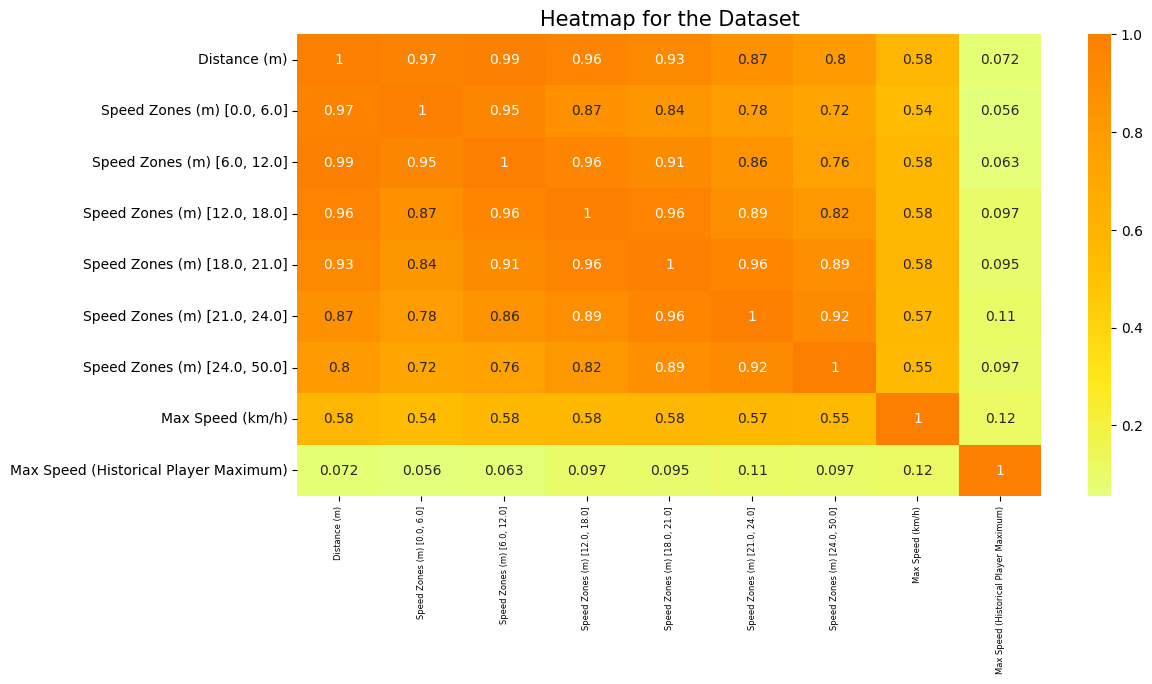

In [ ]:
#Hagamos un HeatMap del df
#Para buscar correlaciones entre las variables del DataFrame
plt.rcParams['figure.figsize'] = (12, 6)

sns.heatmap(week.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

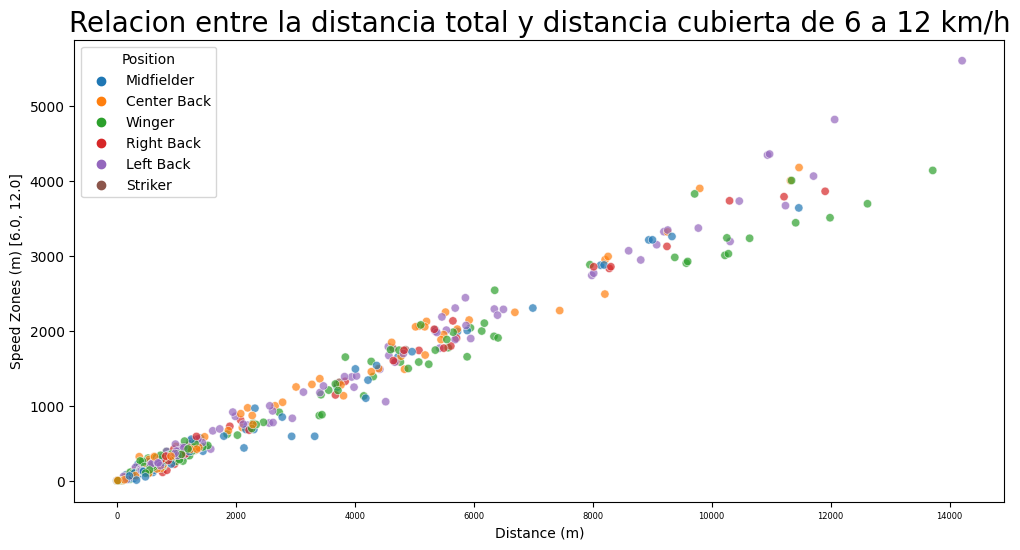

In [ ]:
#Distancia vs Mts. en Velocidad de 6 a 12 km/h

sns.scatterplot(y="Speed Zones (m) [6.0, 12.0]", x="Distance (m)", data=week, hue="Position", alpha=.7)
plt.title('Relacion entre la distancia total y distancia cubierta de 6 a 12 km/h', fontsize = 20, fontweight = 30)
plt.show()

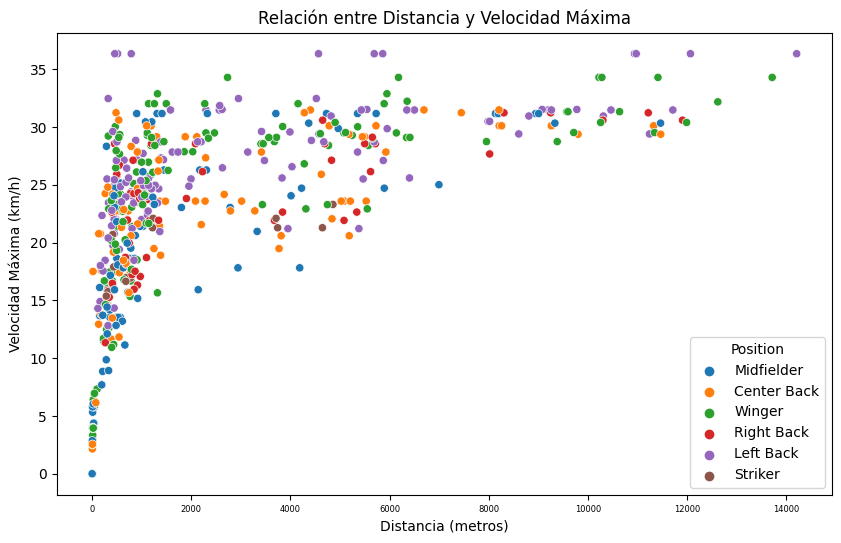

In [ ]:
# Crear un gráfico de dispersión para explorar la relación entre distancia y velocidad máxima
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Distance (m)", y="Max Speed (km/h)", data=week, hue="Position")
plt.xlabel("Distancia (metros)")
plt.ylabel("Velocidad Máxima (km/h)")
plt.title("Relación entre Distancia y Velocidad Máxima")
plt.show()


# **Feature Selection**



In [ ]:
#Importamos el labelencoder de scikit
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()


#convertimos en dato número la posición del jugador.
week['Position'] = LE.fit_transform(week['Position'])
week.shape

week['Position'].unique()

array([2, 0, 5, 3, 1, 4])

In [ ]:
#convertimos en dato número el tipo de sesión.
week['Session Type'] = LE.fit_transform(week['Session Type'])
week.shape

week['Session Type'].unique()


array([3, 2, 1, 0])

In [ ]:
#Eliminar Columna de Fecha porque para escalar las variables no nos deja con Formato de TimeStamp
week = week.drop('Session Date Convertida', axis=1)

In [ ]:
#importamos el modulo de PCA de scikit learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Escalar datos de las variables para que no sean números tan altos en velocidad.
week2 = StandardScaler().fit_transform(week)
#week2.shape

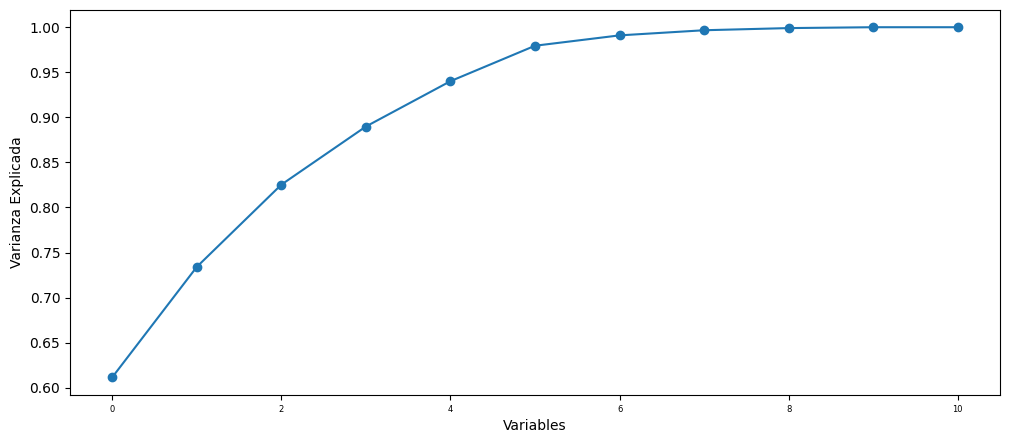

In [ ]:
#iniciamos el objeto de PCA
pca = PCA()
pca.fit(week2)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(),marker="o")
plt.xlabel("Variables")
plt.ylabel("Varianza Explicada")
plt.show()

In [ ]:
print("Varianza explicada por las primeras 4 variables principales =",np.cumsum(evr*100)[4])

Varianza explicada por las primeras 4 variables principales = 94.01436400603245


Con el analisis de componentes principales podemos deducir que las primeras 4 variables del dataset explican el 94% de la varianza del dataset, por lo que ahora realizaremos la seleccion de variables con k=4

In [ ]:
x = week.drop('Max Speed (km/h)', axis=1)
y = week['Max Speed (km/h)']

In [ ]:
!pip install mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          scoring = 'r2',
          cv=None)

In [ ]:
#Lista final de features
sfs.fit(x, y)

SequentialFeatureSelector(cv=None, estimator=LinearRegression(),
                          k_features=(4, 4), scoring='r2')

In [ ]:
#Variables que el algoritmo seleccionó

sfs.k_feature_names_

('Speed Zones (m) [6.0, 12.0]',
 'Speed Zones (m) [18.0, 21.0]',
 'Speed Zones (m) [24.0, 50.0]',
 'Max Speed (Historical Player Maximum)')

#**Modelo de prediccion con regresion lineal**

Modelo con todas las variables.

In [ ]:
#Generamos el set de entrenamiento y el set de validacion
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

df_x = x
df_y = y

In [ ]:
from sklearn.model_selection import train_test_split

#Generamos el set de entrenamiento y el set de validacion
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.5,random_state=42)


from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# Predecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
#probamos el rendimiento del modelo
r2_fs = r2_score(y_test,y_pred)
print(r2_fs)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print("R2:",r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

0.35737789254724206
R2: 0.35737789254724206
MSE: 39.15656678110924
RMSE: 6.257520817473102
MAE: 4.723475785783948


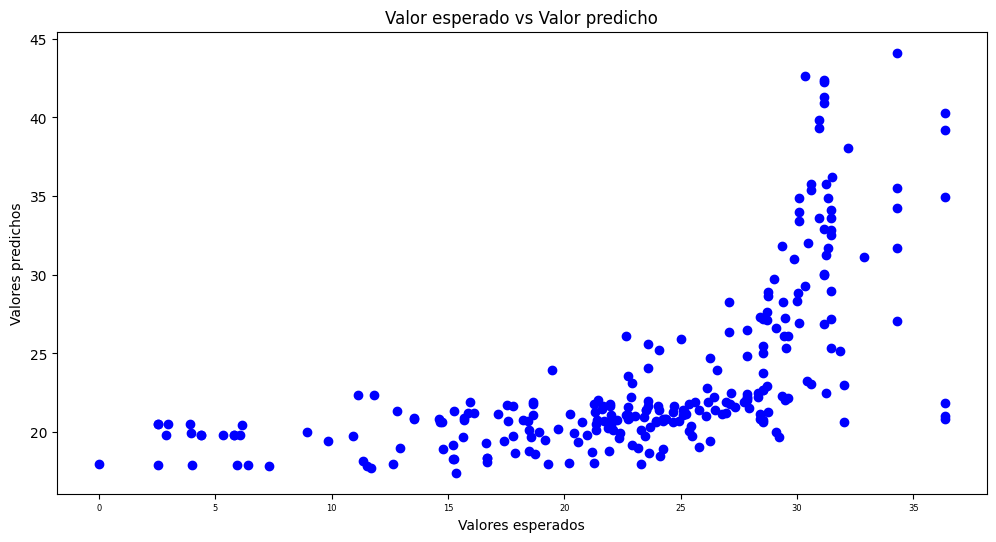

In [ ]:
#graficamos valor esperado vs valor de prediccion
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel("Valores esperados")
plt.ylabel("Valores predichos")
plt.title("Valor esperado vs Valor predicho")
plt.show()

Modelo con las 4 variables seleccionadas, más la agregación de la variable distancia.

In [ ]:
columns_to_access = ['Speed Zones (m) [6.0, 12.0]', 'Speed Zones (m) [18.0, 21.0]', 'Speed Zones (m) [24.0, 50.0]', 'Max Speed (Historical Player Maximum)',
                     'Distance (m)']


In [ ]:
featsel_x= week[columns_to_access]

In [ ]:
#Generamos el set de entrenamiento y el set de validacion
x_fs_train,x_fs_test,y_fs_train,y_fs_test = train_test_split(featsel_x, df_y, test_size=0.5,random_state=42)
# crear el modelo
lr_fs = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr_fs.fit(x_fs_train,y_fs_train)
# Predecir con X_test
y_fs_pred = lr_fs.predict(x_fs_test)

In [ ]:
#probamos el rendimiento del modelo
r2_fs = r2_score(y_fs_test,y_fs_pred)
print(r2_fs)
mse = mean_squared_error(y_fs_test,y_fs_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_fs_test,y_fs_pred)
print("R2:",r2_fs)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

0.36971617652659194
R2: 0.36971617652659194
MSE: 38.40476438433717
RMSE: 6.197157766616659
MAE: 4.688017874011857


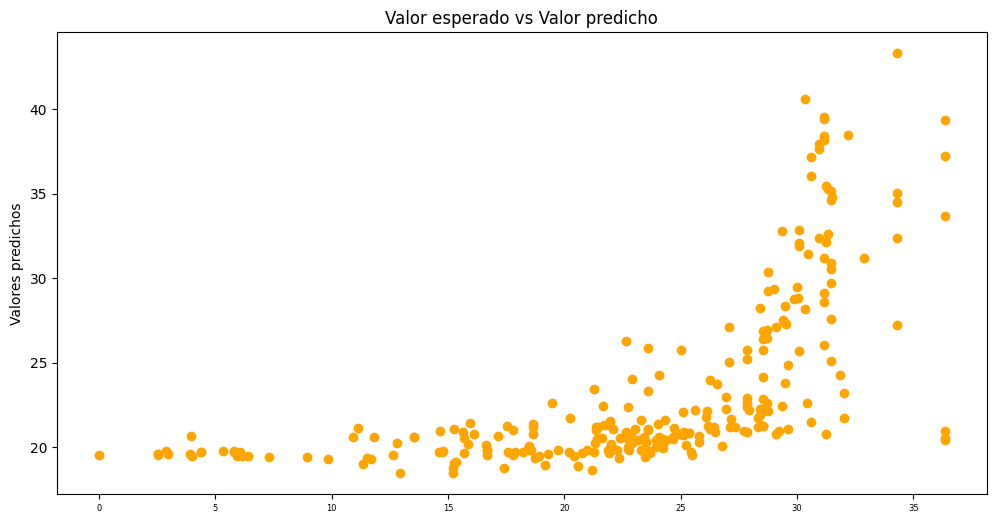

In [ ]:
#graficamos valor esperado vs valor de prediccion
plt.scatter(y_fs_test, y_fs_pred, color = 'orange')
plt.ylabel("Valores predichos")
plt.title("Valor esperado vs Valor predicho")
plt.show()

# **Segunda Ronda de Búsqueda de Modelos**

**Encoding**

En esta etapa, vamos a manejar las variables categóricas para que puedan ser utilizadas por los algoritmos de Machine Learning. Se aplica la técnica "One-Hot Encoding" para convertir las categorías en variables binarias.

In [ ]:
# Aplicar One-Hot Encoding a la columna 'Position'
week_encoded = pd.get_dummies(week, columns=['Position'], prefix='Position')

**Ingeniería de Atributos**

Creamos nuevas características a partir de las características existentes para mejorar la capacidad predictiva del modelo. Una idea podría ser calcular la suma de las duraciones de las sesiones para cada usuario y agregarla como una nueva característica.

In [ ]:
# Calcular la suma de las duraciones de sesiones para cada usuario
week_encoded['Total_Duration'] = week_encoded.sum(axis=1)

# Visualizar los primeros registros del DataFrame con las nuevas columnas creadas
print(week_encoded.head())


                Session Type  Distance (m)  Speed Zones (m) [0.0, 6.0]  \
Username                                                                 
phillippfarber             3   8133.592821                 2821.838135   
nereomarino                3   5086.417666                 2020.478394   
patrickkrueger             3    718.713690                  431.481506   
marvinsharpe               3   9572.792150                 4374.458008   
kianlong                   3   8278.748661                 3404.831299   

                Speed Zones (m) [6.0, 12.0]  Speed Zones (m) [12.0, 18.0]  \
Username                                                                    
phillippfarber                  2873.652588                   1458.796509   
nereomarino                     2062.734131                    899.350403   
patrickkrueger                   273.783447                     13.448741   
marvinsharpe                    2901.281006                   1594.261841   
kianlong           

## **Entrenamiento de Modelos**
Entrenaremos un modelo tanto para clasificación como para regresión. Utilizaremos el módulo sklearn para ello.

### Modelo de Clasificación (Random Forest Classifier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convertir la columna 'Max Speed' en clases categóricas utilizando LabelEncoder
label_encoder = LabelEncoder()
week_encoded['Max Speed (km/h)'] = label_encoder.fit_transform(week_encoded['Max Speed (km/h)'])

# Definir las variable independiente (X) y la variable dependiente (y) para la clasificación
X_classif = week_encoded.drop('Max Speed (km/h)', axis=1)
y_classif = week_encoded['Max Speed (km/h)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(X_classif, y_classif, test_size=0.2, random_state=42)

# Crear el modelo de clasificación
clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo de clasificación
clf.fit(X_train_classif, y_train_classif)

# Realizar predicciones en el conjunto de prueba
y_pred_classif = clf.predict(X_test_classif)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_classif, y_pred_classif)
print("Accuracy:", accuracy)


Accuracy: 0.3619047619047619


### Modelo de Regresión (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir la variable independiente (X) y la variable dependiente (y)
X_reg = week_encoded.drop('Max Speed (km/h)', axis=1)
y_reg = week_encoded['Max Speed (km/h)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Crear el modelo de regresión
reg_model = LinearRegression()

# Entrenar el modelo
reg_model.fit(X_train_reg, y_train_reg)

# Realizar predicciones en el conjunto de prueba
y_pred_reg = reg_model.predict(X_test_reg)

# Calcular el error cuadrado medio del modelo
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse)


Mean Squared Error: 359.27068281548077


### Modelo de Regresión (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Crear el modelo de regresión
regressor = RandomForestRegressor(random_state=42)

# Entrenar el modelo
regressor.fit(X_train_reg, y_train_reg)

# Realizar predicciones en el conjunto de prueba
y_pred_reg = regressor.predict(X_test_reg)

# Calcular el error cuadrado medio del modelo
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse)


Mean Squared Error: 224.02365999999998


### **Análisis de Componentes Principales (PCA)**

**Creación de Nuevas Variables Sintéticas:**

Promedio de la duración de las sesiones por jugador y agregarlo como una nueva característica.

In [ ]:
week_encoded['Average_Duration'] = week_encoded.mean(axis=1)

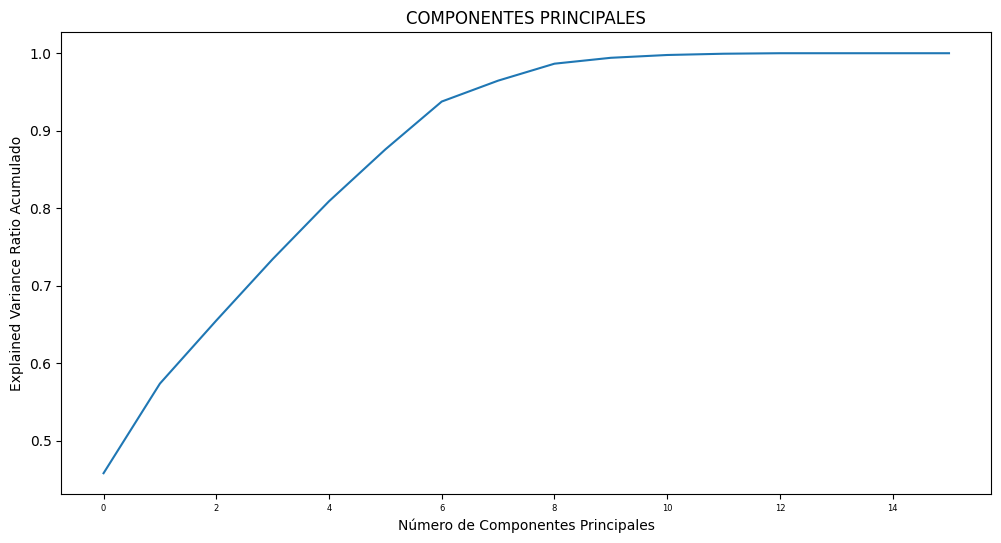

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estándarizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_classif)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio de cada componente
explained_var_ratio = pca.explained_variance_ratio_

# Sumarizamos el explained variance ratio acumulado para cada componente
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Visualización del explained variance ratio acumulado
plt.plot(cumulative_var_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Explained Variance Ratio Acumulado')
plt.title('COMPONENTES PRINCIPALES')
plt.show()


El gráfico representa la proporción acumulada de la varianza total de los datos que es explicada por los primeros N componentes principales. Cada componente principal captura una cierta cantidad de información de los datos originales, y ordenarlos en función de cuánta varianza explican ayuda a decidir cuántos componentes se deben mantener al reducir la dimensionalidad.

### Probar Distintos Modelos y Considerar Bias-Variance Tradeoff

Nuestro objetivo es encontrar un equilibrio:

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Crear el modelo de RandomForest para determinar la importancia de las características
model = RandomForestRegressor(random_state=42)
model.fit(X_train_reg, y_train_reg)

# Utilizar SelectFromModel para seleccionar características basadas en su importancia
feature_selector = SelectFromModel(model, threshold='median')
feature_selector.fit(X_train_reg, y_train_reg)

# Obtener el nuevo conjunto de características
X_train_selected = feature_selector.transform(X_train_reg)
X_test_selected = feature_selector.transform(X_test_reg)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Regression', SVR())
]

for name, model in models:
    model.fit(X_train_selected, y_train_reg)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")


Linear Regression - Mean Squared Error: 4458.693137908059
Random Forest - Mean Squared Error: 222.75205428571434
Support Vector Regression - Mean Squared Error: 5610.290020642423


### **Realizar PCA y Explorar Cargas de Componentes**
Vamos a utilizar PCA para explorar las cargas de los dos primeros componentes y determinar las variables más relevantes, en este caso seleccionamos 6 ya que son las que nos arroja el PCA y el punto de mayor varianza creo que puede estar explicado con un valor de 6.


In [ ]:
from sklearn.decomposition import PCA

# Realizar PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_selected)

# Obtener las cargas de los dos primeros componentes
component_1_loadings = pca.components_[0]
component_2_loadings = pca.components_[1]

# Mostrar las variables más relevantes en cada componente
n_top_features = 6
top_feature_indices_1 = component_1_loadings.argsort()[-n_top_features:][::-1]
top_feature_indices_2 = component_2_loadings.argsort()[-n_top_features:][::-1]

top_features_1 = week.columns[top_feature_indices_1]
top_features_2 = week.columns[top_feature_indices_2]

print("Variables más relevantes en el primer componente:", top_features_1)
print("Variables más relevantes en el segundo componente:", top_features_2)



Variables más relevantes en el primer componente: Index(['Session Type', 'Distance (m)', 'Speed Zones (m) [0.0, 6.0]',
       'Speed Zones (m) [6.0, 12.0]', 'Speed Zones (m) [12.0, 18.0]',
       'Speed Zones (m) [18.0, 21.0]'],
      dtype='object')
Variables más relevantes en el segundo componente: Index(['Session Type', 'Position', 'Speed Zones (m) [21.0, 24.0]',
       'Speed Zones (m) [18.0, 21.0]', 'Speed Zones (m) [12.0, 18.0]',
       'Speed Zones (m) [6.0, 12.0]'],
      dtype='object')


# **CrossValidation y Mejora de modelo de ML**

La validación cruzada nos será útil para obtener una evaluación más robusta del rendimiento del modelo.

## **RandomForestRegressor**

In [ ]:
from sklearn.model_selection import cross_val_score

# Crear el modelo de regresión (RandomForestRegressor)
regressor = RandomForestRegressor(random_state=42)

# Realizar validación cruzada con 8 folds
# Utilizamos cross_val_score para obtener una lista de puntuaciones (negativas del MSE)
# cv=5 especifica el número de folds
scores = cross_val_score(regressor, X_train_selected, y_train_reg, cv=8, scoring='neg_mean_squared_error')

# Convertir las puntuaciones negativas del MSE a MSE positivos
positive_scores = -scores

# Calcular el promedio de los MSE positivos
average_mse = np.mean(positive_scores)
print("Promedio de MSE utilizando validación cruzada:", average_mse)


Promedio de MSE utilizando validación cruzada: 220.79007592525397


Dado que la columna "Max Speed (km/h)" se refiere a la velocidad máxima en kilómetros por hora, un MSE de 220.79 en el contexto de las velocidades máximas sugiere que las predicciones del modelo RandomForestRegressor tienen un nivel aceptable de precisión. En otras palabras, el modelo tiene una tendencia a predecir las velocidades máximas con un error relativamente bajo en comparación con los valores reales, en función del contexto y escala de datos.

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Crear el modelo de regresión lineal
linear_reg_model = LinearRegression()

# Realizar validación cruzada con 5 folds
linear_scores = cross_val_score(linear_reg_model, X_train_selected, y_train_reg, cv=5, scoring='neg_mean_squared_error')

# Convertir las puntuaciones negativas del MSE a MSE positivos
positive_linear_scores = -linear_scores

# Calcular el promedio de los MSE positivos
average_linear_mse = np.mean(positive_linear_scores)
print("Promedio de MSE utilizando regresión lineal y validación cruzada:", average_linear_mse)


Promedio de MSE utilizando regresión lineal y validación cruzada: 4623.166091576309


En resumen, un MSE de 4623.1660 para la columna "Max Speed (km/h)" en un modelo de regresión lineal con validación cruzada indica que las predicciones están relativamente cerca de los valores reales. Sin embargo, puede haber diferencias en el rendimiento en comparación con otros modelos, como RandomForestRegressor.







# **XG Boost**

In [ ]:
#Importar XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

## **Regresión con RandomForest**

In [ ]:
# Convertir los DataFrames de pandas a matrices NumPy
X_train_reg_np = X_train_reg.values
X_test_reg_np = X_test_reg.values
y_train_reg_np = y_train_reg.values
y_test_reg_np = y_test_reg.values

# Crear el modelo de regresión con XGBoost
xgb_rf_reg_model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
xgb_rf_reg_model.fit(X_train_reg_np, y_train_reg_np)

# Realizar predicciones en el conjunto de prueba
y_pred_reg_xgb_rf = xgb_rf_reg_model.predict(X_test_reg_np)

# Calcular el error cuadrado medio del modelo
mse_reg_xgb_rf = mean_squared_error(y_test_reg_np, y_pred_reg_xgb_rf)
print("Mean Squared Error (XGBoost - Regresión con RandomForest):", mse_reg_xgb_rf)




Mean Squared Error (XGBoost - Regresión con RandomForest): 171.54180298722835
